In [3]:
import numpy as np # numerical computation
import pandas as pd # # data processing/manipulation
import matplotlib.pyplot as plt # basic data visualization
# import seaborn as sns # nicer data visualization
import time

# stopwords, tokenizer, stemmer
import nltk  
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet



import re # regular expressions


import gensim #new nltk library for language processing
from gensim.parsing.preprocessing import remove_stopwords # we also use gensim for stopwords removal

from textblob import TextBlob

In [1]:
import sys
#!{sys.executable} -m pip install flair

In [87]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')

In [88]:
pd.options.display.max_colwidth = 1000 #by default, Python will likely display only the first 50 characters from a long text
#pd.options.display.float_format = '{:20,.f}'.format
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from pathlib import Path

out_folder = '../output' # folder to save intermediary data to
# Path(out_folder).mkdir(parents=True, exist_ok=True)

In [6]:
# Read in tweet file cleaned for null values etc to ensure that the tweets are unique
biden_csv_path = out_folder + '/biden_usa_unique_df.csv'
trump_csv_path = out_folder + '/trump_usa_unique_df.csv'

In [7]:
biden_usa_unique_df = pd.read_csv(biden_csv_path, lineterminator='\n')
trump_usa_unique_df = pd.read_csv(trump_csv_path, lineterminator='\n')

In [8]:
#Cleaned tweets after processing them using lemmitization, stemming etc.
clean_tweets_path = out_folder + '/clean_tweets_df.csv'
tweets_df = pd.read_csv(clean_tweets_path, lineterminator='\n')

In [9]:
# A processed CSV will have these columns. If the user wants to reprocess data, we need to remove them and run.
# We have tried many different approaches for tweet cleaning. The below analysis is for one of the data sample.
tweets_df.drop(columns=['blob_polarity', 'blob_subjectivity', 'blob_sentiment'], axis=1, inplace=True)

In [95]:
tweets_df.head(10)[['tweet', 'clean_tweet_nltk']]

,tweet,clean_tweet_nltk
0,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,twitter help democrat win election make sure see negative story biden negative story trump twittercensorship biden ukraine hunterbiden
1,Come on @ABC PLEASE DO THE RIGHT THING. Move the #biden town hall. I bet a requirement for Orange Monkey to do the NBC town hall was to have it opposite Biden. PLEASE MOVE YOURS.,come right thing biden town hall bet requirement orange monkey nbc town hall opposite biden
2,"#realDonaldTrump addresses #JoeBiden and #HunterBiden corruption, more proof of which discovered on a laptop.\n#ObamaBidenGate #NYPost #MSNBC #CBS #NBC #ABC #FoxNews #KamalaHarris https://t.co/7RtMOdoXGd",realdonaldtrump address joebiden hunterbiden corruption proof discover laptop obamabidengate nypost msnbc cbs nbc abc foxnews kamalaharris
3,"Hunter #Biden introduced his father, then-Vice President Joe Biden, to a top executive at a Ukrainian energy firm less than a year before the elder Biden pressured government officials in Ukraine into firing a prosecutor who was investigating the company, according to emails",hunter biden introduce father president joe biden executive ukrainian energy firm year elder biden pressure government official ukraine fire prosecutor investigate company accord email
4,This is from the same night I met the cast of #TWW and I was wearing the same shirt as @AllisonBJanney 😍\n\n#VOTE #voteblue #JoeBiden #LoveTrumpsHate https://t.co/aESuB1ipBq,night met cast tww wear shirt vote voteblue joebiden lovetrumpshate
5,"@realDonaldTrump #TrumpIsALaughingStock @realDonaldTrump at his Iowa cult rally compared #JoeBiden to Putin, XI, and Kim Jong-un. In the same sentence he called @JoeBiden “shot” and all 3 communist leaders “SHARP”\n\n#TrumpIsANationalDisgrace",trumpisalaughingstock iowa cult rally compare joebiden putin kim sentence call shot communist leader sharp trumpisanationaldisgrace
6,"Laptop computer abandoned at Delaware repair shop contains #emails between #HunterBiden &amp; senior #Burisma #adviser indicating Hunter arranged a meeting between then VP #JoeBiden &amp; the adviser in Washington, DC in 2015.\nJoe Biden Calls a Lid &amp; Hides https://t.co/X1ynqJzbUN",laptop abandon delaware repair shop contains email hunterbiden amp senior burisma adviser indicate hunter arrange meeting joebiden amp adviser washington joe biden call lid amp hide
7,"Vice President #Biden is 77 years young.\nI am willing to bet that he has a long list of things he’d rather focus on and enjoy life, than cleaning up 🧹 the deadly mess left by spineless republicans and #DonTheCon \nHis only motive is to #BuildBackBetter #VoteForDemocracy #Vote",vice president biden year young willing bet long list thing focus enjoy life cleaning deadly mess left spineless republican donthecon motive buildbackbetter votefordemocracy vote
8,"So the #FBI received the LAPTOP with the EMAILS and instead of acting on behalf of the American people and pursuing justice, they pushed it under the rug to cover up for #JoeBiden \n#HunterBidenEmails\n\n#ChristopherWray \nResign Now!",fbi receive laptop email instead act behalf american people pursue justice push rug cover joebiden hunterbidenemails christopherwray resign
9,And Trump claims Biden has dementia? \n#DonaldOut #TrumpRally #trumpDementia #Biden #Vote #TrumpIsNotAmerica #MAGA #StopTrumpsTerror https://t.co/cuvce2uIpT,trump claim biden dementia donaldout trumprally trumpdementia biden vote trumpisnotamerica maga stoptrumpsterror


### TextBlob Analysis

In [103]:
tweets_df = tweets_df.dropna(subset=['clean_tweet_nltk'])

In [112]:
# Helper Function to assign Label for Sentiment Analysis with TextBlob
def create_sentiment_labels(value):
    '''
    in: 
        value on which to classify
    out: 
        return the sentiment class
    '''
    if value > 0:
        return 'positive'
    elif value < 0:
        return 'neutral'
    else:
        return 'negative'


In [113]:
# Polarity and subjectivity
def sentiment_analysis(dataframe):
    dataframe['blob_polarity'] = dataframe['clean_tweet_nltk'].apply(lambda x: TextBlob(x).sentiment.polarity)
    dataframe['blob_subjectivity'] = dataframe['clean_tweet_nltk'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [115]:
import time
start =  time.time()

sentiment_analysis(tweets_df)

stop = time.time()
print(f'Sentiment analysis with TextBlob took: {round((stop-start)/60, 3)} minutes')

Sentiment analysis with TextBlob took: 0.678 minutes


In [116]:
tweets_df['blob_sentiment']= tweets_df['blob_polarity'].apply(create_sentiment_labels)

In [117]:
tweets_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,...,continent,state,state_code,lang,ds,tokenized_tweet_nltk,clean_tweet_nltk,blob_polarity,blob_subjectivity,blob_sentiment
0,2020-10-15 00:01:47,"1,316,529,668,279,894,016.00",Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.00,0.00,"1,139,961,955,861,651,584.00",2.00,"Hollywood, FL",34.10,-118.33,...,North America,California,CA,en,biden,"['twitter', 'help', 'democrat', 'win', 'election', 'make', 'sure', 'see', 'negative', 'story', 'biden', 'negative', 'story', 'trump', 'twittercensorship', 'biden', 'ukraine', 'hunterbiden']",twitter help democrat win election make sure see negative story biden negative story trump twittercensorship biden ukraine hunterbiden,0.17,0.52,positive
1,2020-10-15 00:02:06,"1,316,529,746,109,509,632.00",Come on @ABC PLEASE DO THE RIGHT THING. Move the #biden town hall. I bet a requirement for Orange Monkey to do the NBC town hall was to have it opposite Biden. PLEASE MOVE YOURS.,0.00,0.00,"334,322,367.00",166.00,"New York, NY",40.71,-74.01,...,North America,New York,NY,en,biden,"['come', 'right', 'thing', 'biden', 'town', 'hall', 'bet', 'requirement', 'orange', 'monkey', 'nbc', 'town', 'hall', 'opposite', 'biden']",come right thing biden town hall bet requirement orange monkey nbc town hall opposite biden,0.08,0.18,positive
2,2020-10-15 00:02:23,"1,316,529,819,363,016,704.00","#realDonaldTrump addresses #JoeBiden and #HunterBiden corruption, more proof of which discovered on a laptop.\n#ObamaBidenGate #NYPost #MSNBC #CBS #NBC #ABC #FoxNews #KamalaHarris https://t.co/7RtMOdoXGd",0.00,1.00,"3,381,891,372.00",411.00,"Minneapolis, MN",44.98,-93.27,...,North America,Minnesota,MN,en,biden,"['realdonaldtrump', 'address', 'joebiden', 'hunterbiden', 'corruption', 'proof', 'discover', 'laptop', 'obamabidengate', 'nypost', 'msnbc', 'cbs', 'nbc', 'abc', 'foxnews', 'kamalaharris']",realdonaldtrump address joebiden hunterbiden corruption proof discover laptop obamabidengate nypost msnbc cbs nbc abc foxnews kamalaharris,0.00,0.00,negative
3,2020-10-15 00:03:17,"1,316,530,047,369,572,352.00","Hunter #Biden introduced his father, then-Vice President Joe Biden, to a top executive at a Ukrainian energy firm less than a year before the elder Biden pressured government officials in Ukraine into firing a prosecutor who was investigating the company, according to emails",1.00,0.00,"193,687,333.00","2,418.00","New York, USA",40.71,-74.01,...,North America,New York,NY,en,biden,"['hunter', 'biden', 'introduce', 'father', 'president', 'joe', 'biden', 'executive', 'ukrainian', 'energy', 'firm', 'year', 'elder', 'biden', 'pressure', 'government', 'official', 'ukraine', 'fire', 'prosecutor', 'investigate', 'company', 'accord', 'email']",hunter biden introduce father president joe biden executive ukrainian energy firm year elder biden pressure government official ukraine fire prosecutor investigate company accord email,-0.20,0.40,neutral
4,2020-10-15 00:03:24,"1,316,530,075,404,300,288.00",This is from the same night I met the cast of #TWW and I was wearing the same shirt as @AllisonBJanney 😍\n\n#VOTE #voteblue #JoeBiden #LoveTrumpsHate https://t.co/aESuB1ipBq,0.00,0.00,"558,180,437.00",133.00,"Indianapolis, IN",39.77,-86.16,...,North America,Indiana,IN,en,biden,"['night', 'met', 'cast', 'tww', 'wear', 'shirt', 'vote', 'voteblue', 'joebiden', 'lovetrumpshate']",night met cast tww wear shirt vote voteblue joebiden lovetrumpshate,0.00,0.00,negative


**Different ways to look at the same data.**

Option a: 
In the next plot, we will compute an average polarity per candidate as follows:

we simply average the polarity feature computed by TextBlob across all tweets per candidate.
Issues with this approach:

imagine we have 1 user who tweeted 99 times, each having polarity -1 (a candidate opposer). And 1 user who tweeted once with polarity 1 (a candidate supporter). If we average across all tweets, we obtain -0.98.
What can we infer from this result ?

inferring support / opposing for the candidate would be wrong, since in our sample we actually have one opposant and 1 supporter.
we can only infer the trivial: that the result is just the average sentiment across all tweets.

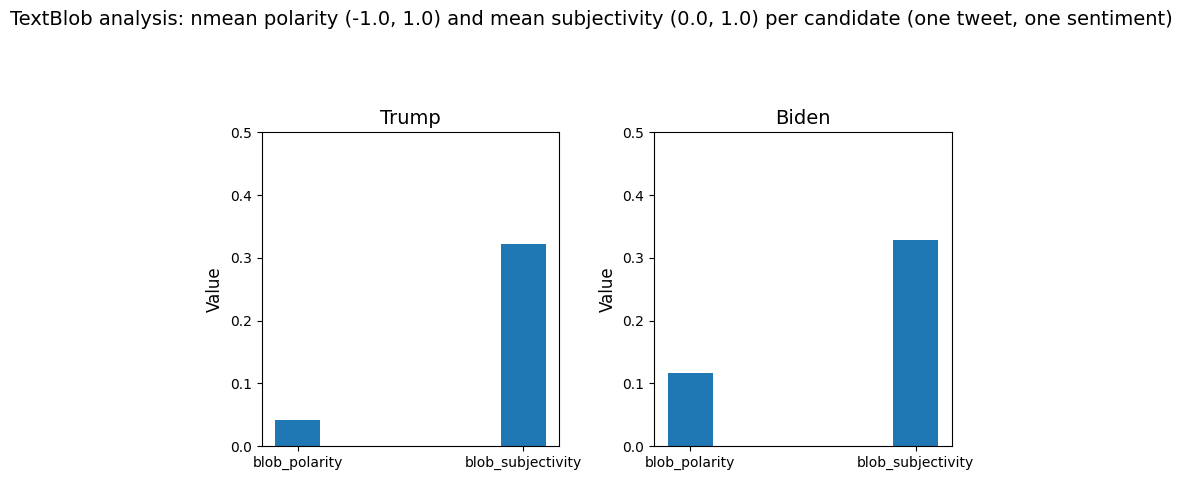

In [119]:
#update the divided dataset
trump_df = tweets_df[tweets_df.ds=='trump']
biden_df = tweets_df[tweets_df.ds=='biden']

fig, axes = plt.subplots(1, 2, figsize=(8,5))

fig.suptitle('TextBlob analysis: nmean polarity (-1.0, 1.0) and mean subjectivity (0.0, 1.0) per candidate (one tweet, one sentiment)', fontsize=14)

features = ['blob_polarity', 'blob_subjectivity']
values = [trump_df.groupby(['user_id'])['blob_polarity'].mean().mean(), trump_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[0].bar(features,values, width=0.2)
axes[0].set_ylim(0, .5)
axes[0].set_title('Trump', fontsize = 14)
axes[0].set_ylabel('Value', fontsize = 12)

values = [biden_df.groupby(['user_id'])['blob_polarity'].mean().mean(), biden_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[1].bar(features,values, width=0.2)
axes[1].set_ylim(0, .5)
axes[1].set_title('Biden', fontsize = 14)
axes[1].set_ylabel('Value', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

trump_usa_pol_tweet =trump_df['blob_polarity'].mean()
trump_usa_subj_tweet = trump_df['blob_subjectivity'].mean()
biden_usa_pol_tweet = biden_df['blob_polarity'].mean()
biden_usa_subj_tweet = biden_df['blob_subjectivity'].mean()

**Option b**

Another option is to:

first average sentiment expressed through tweets per user id -> we will have one averge expressed sentiment per user per candidate
then average across the whole population for each candidate

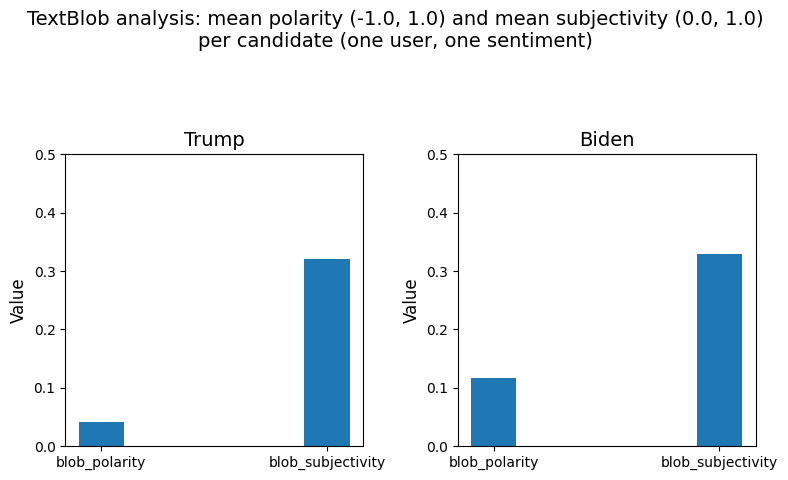

In [120]:
# the below gives us a mean per user
# trump_usa_df[['user_id', 'Polarity']].groupby(['user_id'])['Polarity'].mean()

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

fig.suptitle('TextBlob analysis: mean polarity (-1.0, 1.0) and mean subjectivity (0.0, 1.0)\nper candidate (one user, one sentiment)', fontsize=14)

features = ['blob_polarity', 'blob_subjectivity']
values = [trump_df.groupby(['user_id'])['blob_polarity'].mean().mean(), trump_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[0].bar(features,values, width=0.2,)
axes[0].set_ylim(0, .5)
axes[0].set_title('Trump', fontsize = 14)
axes[0].set_ylabel('Value', fontsize = 12)

values = [biden_df.groupby(['user_id'])['blob_polarity'].mean().mean(), biden_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()]
axes[1].bar(features,values, width=0.2,)
axes[1].set_ylim(0, .5)
axes[1].set_title('Biden', fontsize = 14)
axes[1].set_ylabel('Value', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

trump_usa_pol_user = trump_df.groupby(['user_id'])['blob_polarity'].mean().mean()
trump_usa_subj_user = trump_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()
biden_usa_pol_user = biden_df.groupby(['user_id'])['blob_polarity'].mean().mean()
biden_usa_subj_user = biden_df.groupby(['user_id'])['blob_subjectivity'].mean().mean()

/var/folders/kb/f8s6crrs62x4qzzz67rpwl0c0000gn/T/ipykernel_37195/1881035799.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['', 'Polarity', '', '', '', '', '', 'Subjectivity'])
/var/folders/kb/f8s6crrs62x4qzzz67rpwl0c0000gn/T/ipykernel_37195/1881035799.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['', 'Polarity', '', '', '', '', '', 'Subjectivity'])


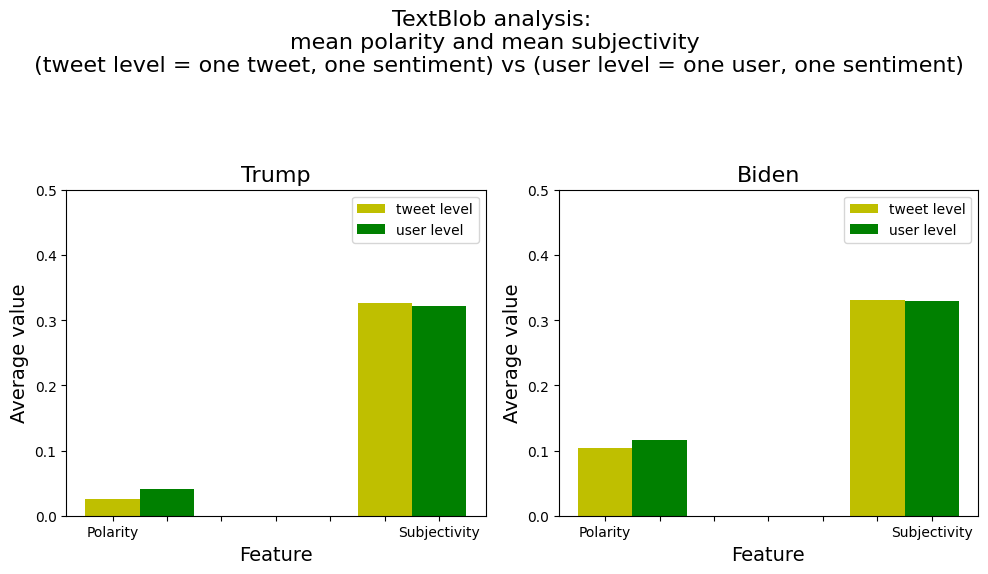

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))

fig.suptitle('TextBlob analysis: \nmean polarity and mean subjectivity\n (tweet level = one tweet, one sentiment) vs (user level = one user, one sentiment)', fontsize=16)

#features = ['Polarity', 'Subjectivity']
features = np.array([1, 2])
values_tweet = [ trump_usa_pol_tweet, trump_usa_subj_tweet]
values_user = [ trump_usa_pol_user, trump_usa_subj_user]

#values = [[trump_usa_pol_tweet, trump_usa_subj_tweet], 
#[trump_usa_pol_user, trump_usa_subj_user]]

axes[0].bar(features-0.2, values_tweet, width=0.2, align = 'center', color = 'y')
axes[0].bar(features, values_user, width=0.2, align = 'center', color = 'g')
#axes[0].bar(features,values)
axes[0].set_ylim(0, .5)
axes[0].set_title('Trump', fontsize = 16)
axes[0].set_xlabel('Feature', fontsize = 14)
axes[0].set_ylabel('Average value', fontsize = 14)
axes[0].set_xticklabels(['', 'Polarity', '', '', '', '', '', 'Subjectivity'])
labels= ["tweet level", "user level"]
axes[0].legend(labels)

values_tweet = [ biden_usa_pol_tweet, biden_usa_subj_tweet]
values_user = [ biden_usa_pol_user, biden_usa_subj_user]
axes[1].bar(features-0.2,values_tweet, width=0.2, align = 'center', color = 'y')
axes[1].bar(features,values_user, width=0.2, align = 'center', color = 'g')
axes[1].set_ylim(0, .5)
axes[1].set_title('Biden', fontsize = 16)
axes[1].set_xlabel('Feature', fontsize = 14)
axes[1].set_ylabel('Average value', fontsize = 14)
axes[1].set_xticklabels(['', 'Polarity', '', '', '', '', '', 'Subjectivity'])

labels= ["tweet level", "user level"]
axes[1].legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

It doesn't really matter how we average the sentiment. In any case, "one user one sentiment" makes much more sense for our analysis. But it's easier to code the "one tweet one sentiment", so we'll use this one, since it has the same result.

Most commonly, it is used to refer to the task of automatically determining the valence or polarity of a piece of text, whether it is positive, negative, or neutral. However, more generally, it refers to determining one's attitude towards a particular target or topic.

Valence is distribution of sentiments

/var/folders/kb/f8s6crrs62x4qzzz67rpwl0c0000gn/T/ipykernel_37195/1816900079.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])


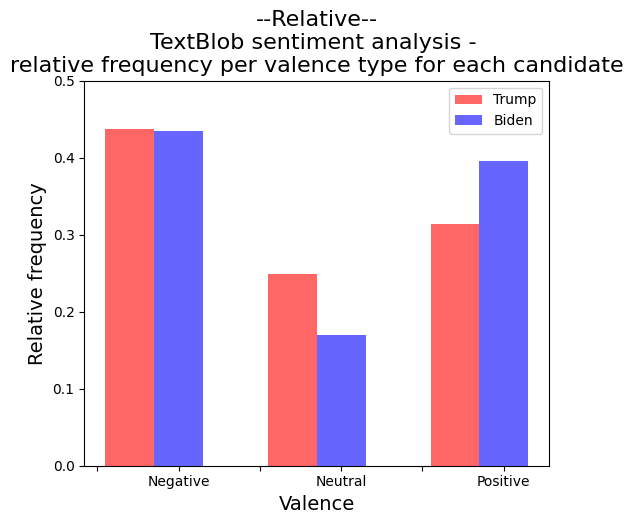

In [122]:
plt.figure(figsize=(6,5))

ax = plt.gca()
ax.set_title('--Relative--\nTextBlob sentiment analysis - \nrelative frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])
trump = (trump_df['blob_sentiment'].sort_values().value_counts()/trump_df['blob_sentiment'].shape[0])[['negative', 'neutral', 'positive']]
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha= .6)

biden = (biden_df['blob_sentiment'].sort_values().value_counts()/biden_df['blob_sentiment'].shape[0])[['negative', 'neutral', 'positive']]
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha= .6)

ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Relative frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

Observations from the above plot:

the ratio of positive:negative is higher for Biden than for Trump. When people tweet about Biden, they tend to be less negative than when they tweet about Trump.

/var/folders/kb/f8s6crrs62x4qzzz67rpwl0c0000gn/T/ipykernel_37195/1127204069.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])


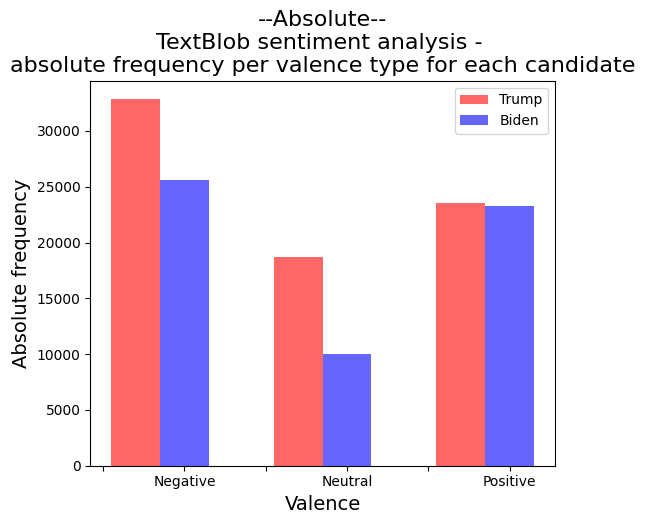

In [123]:
plt.figure(figsize=(6,5))

ax = plt.gca()
ax.set_title('--Absolute--\nTextBlob sentiment analysis - \nabsolute frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])
trump = (trump_df['blob_sentiment'].sort_values().value_counts())[['negative', 'neutral', 'positive']]
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha=0.6)

biden = (biden_df['blob_sentiment'].sort_values().value_counts())[['negative', 'neutral', 'positive']]
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha = 0.6)

#ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Absolute frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

The absolute frequency plot is relevant because all those negative tweets could potentially be support votes for the other candidate, since in presidential elections people only have 2 options. If they hate one candidate, that could be enough reason to vote for the other one.

## Vader

## 5. Sentiment analysis with VADER

VADER (Valence Aware Dictionary for Sentiment Reasoning) was developed in 2014.   
You can check [Vader's official github](https://github.com/cjhutto/vaderSentiment) for details of how the tool was designed and how to use it. 

According to [VADER's github](https://github.com/cjhutto/vaderSentiment), VADER is "Empirically validated by multiple independent human judges, VADER incorporates a "gold-standard" sentiment lexicon that is especially attuned to microblog-like contexts."

Vader is a pre-trained model. If you want to read about the model in detail, the official website recommends [2]


Vader **outputs** something like this:   
_{'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'compound': 0.3802}_

**Negative**, **neutral** and **positive** are scores between 0 and 1.  
The **compound** value reflects the overall sentiment of the text. It's computed based on the values of negative, neutral and positive. It ranges from -1 (maximum negativity) to 1 (maximum positivity). 

The is no standard way to interpret compound. 
One can decide that whatever is larger than 0 is positive and lower is negative, while 0 means neutral.    
But we can also decide to look only at more extreme values, like above or below +/- 0.8, for example.   
It really depends on the kind of data you have.

**\[2]** Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [124]:
sid = SentimentIntensityAnalyzer()
# Run the analysis on clean and unclean data and it is recommended

In [125]:
def sentiment_analysis_vader(df, clean = True):
    if clean:
        target_col = 'clean_tweet_nltk'
        prefix = 'vader_clean_'
    else:
        target_col = 'tweet'
        prefix = 'vader_'
    
    scores_col = prefix+'scores'
    
    #let's make it vader_sentiment, so that it has the same naming convention as TextBlob and Flair sentiment score
    #compound_col = prefix+'compound'
    compound_col = prefix+'polarity'
    
    #comp_score_col = prefix+'comp_score'
    comp_score_col = prefix+'sentiment' 
    
    df[scores_col] = df[target_col].apply(lambda tweet: sid.polarity_scores(tweet))
    df[compound_col] = df[scores_col].apply(lambda d: d['compound'])
    df[comp_score_col] = df[compound_col].apply(create_sentiment_labels)

In [126]:
start = time.time()

sentiment_analysis_vader(tweets_df)
sentiment_analysis_vader(tweets_df, clean = False)

stop = time.time()
print(f'Sentiment analysis with VADER took: {round((stop-start)/60, 3)} minutes')

#update the divided dataset
trump_df = tweets_df[tweets_df.ds=='trump']
biden_df = tweets_df[tweets_df.ds=='biden']

Sentiment analysis with VADER took: 0.968 minutes


Does it matter if we clean the tweets before feeding them to Vader ? Does Vader itself perform a good enough cleaning ? We answer this question by classifying tweets into positive / neutral / negative using both approaches and then looking at the accuracy_score for the labels obtained through the two methods.

Does it matter if we clean the tweets before feeding them to Vader ? Does Vader itself perform a good enough cleaning ? We answer this question by classifying tweets into positive / neutral / negative using both approaches and then looking at the accuracy_score for the labels obtained through the two methods.

In [132]:
import sys
!{sys.executable} -m pip install scikit-learn

  Using cached scikit_learn-1.1.3-cp310-cp310-macosx_10_9_x86_64.whl (8.7 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [133]:
from sklearn.metrics import accuracy_score

start = time.time()

print(f"Accuracy score for our cleaning vs vader tweet cleaning for Trump: {accuracy_score(trump_df['vader_sentiment'],trump_df['vader_clean_sentiment']):.4}")
print(f"Accuracy score for our cleaning vs vader tweet cleaning for Biden: {accuracy_score(biden_df['vader_sentiment'],biden_df['vader_clean_sentiment']):.4}")

stop = time.time()
print(f'This took: {round((stop-start)/60, 3)} minutes')

Accuracy score for our cleaning vs vader tweet cleaning for Trump: 0.8384
Accuracy score for our cleaning vs vader tweet cleaning for Biden: 0.8736
This took: 0.002 minutes


It looks like there is 84% consensus for Trump and 88% consensus for Biden for sentiment per tweet when VADER is fed the raw data versus the cleaned data.
So that means the decision to feed raw or cleaned data should be given some thought.
Since we don't have labelled data, the only way to decide which method is best is by visual inspection.

In [134]:
#Uncomment the code below if you want to visualize some tweets yourself
#We decided based on analysis to feed the raw tweet to VADER and let it run the cleaning itself

#Some tweets arel long. This setting makes sure Python does not truncate the output. Default value is 50.

pd.options.display.max_colwidth = 300
trump_df[['tweet', 'clean_tweet_nltk', 'vader_sentiment', 'vader_clean_sentiment']].head(20)


,tweet,clean_tweet_nltk,vader_sentiment,vader_clean_sentiment
58876,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",trump student hear year year heard china know ask say know million like million,positive,positive
58877,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,tie tie trump rally iowa,negative,negative
58878,#Trump #PresidentTrump #Trump2020LandslideVictory #Trump2020 #MAGA #KAG #4MoreYears #America #AmericaFirst #AllLivesMatter #Winning #Vote #VoteInPerson #VoteTrump #VotePresidentTrump https://t.co/TzXBKOvgNs,trump presidenttrump maga kag america americafirst alllivesmatter win vote voteinperson votetrump votepresidenttrump,negative,positive
58879,"#Trump: Nobody likes to tell you this, but some of the farmers were doing better the way I was doing it than they were by working their asses off.\n\nAnd that check? It's totally in the mail, right Don?",trump like tell farmer well way work ass check totally mail right,positive,positive
58880,@karatblood @KazePlays_JC Grab @realDonaldTrump by the balls &amp; chuck the bastard out the door onto #PennsylvaniaAvenue &amp; form a line &amp; everybody gets to kick #DonaldTrump in the nuts! Please note 1 kick per person only! #BidenHarrisToSaveAmerica #VoteBlueToSaveOurDemocracy,grab ball amp chuck bastard door pennsylvaniaavenue amp form line amp everybody get kick donaldtrump nut note kick person bidenharristosaveamerica votebluetosaveourdemocracy,neutral,neutral
58881,Who does #trump owe 420 million dollars to? What are the terms? Who is #DonaldTrump beholden to? WE DEMAND TO KNOW!\n#TrumpIsANationalSecurityRisk \n#FollowTheMoney \n#TrumpTaxCheat \n#TrumpTaxFraud,trump owe million dollar term donaldtrump beholden demand know trumpisanationalsecurityrisk followthemoney trumptaxcheat trumptaxfraud,neutral,neutral
58882,"#TheWeek: ""#Trump in Penn: ""I saved suburbia. I got rid of a regulation that was a disaster and it was really unfair and it's gotten a lot worse under Obama and Biden. You damn well better vote for me Pennsylvania, you better vote."" But he never did identify the 'regulation.' https://t.co/7CX0PB...",theweek trump penn save suburbia get rid regulation disaster unfair gotten lot bad obama biden damn well vote pennsylvania well vote identify,neutral,neutral
58883,#TheReidOut \n\nAm I suppose to feel badly for @OMAROSA? Isn't she the person who once claimed #Trump critics would have to bow at the feet of Donald? Sorry the snakes deserve one another. \n\n@JoyAnnReid,thereidout suppose feel badly person claimed trump critic bow foot donald sorry snake deserve another,neutral,neutral
58884,I have lost track of what #Trump is talking about. So has Trump.,lose track trump talk trump,neutral,neutral
58885,@glennkirschner2 So basically the American experiment has failed ; we have no power we are just at the mercy to theses people .. not just Trump but the people who are down for his agenda ; because let’s not pretend #Trump hasn’t done anything that the isn’t on the GOP’s wish list ..,basically american experiment fail power mercy thesis people trump people agenda let pretend trump gop wish list,positive,positive


Let's have a look at number of tweets per valence for both candidates and see if we spot anything interesting. 

In [137]:
def get_valence_relative_freq(df):
    
    grouped = df.groupby(['vader_sentiment'])
    valence = grouped['vader_sentiment'].value_counts(normalize=False, sort=False)
    valence = valence.droplevel(0)
    valence = valence / valence.sum()
    return valence

Matplotlib is building the font cache; this may take a moment.


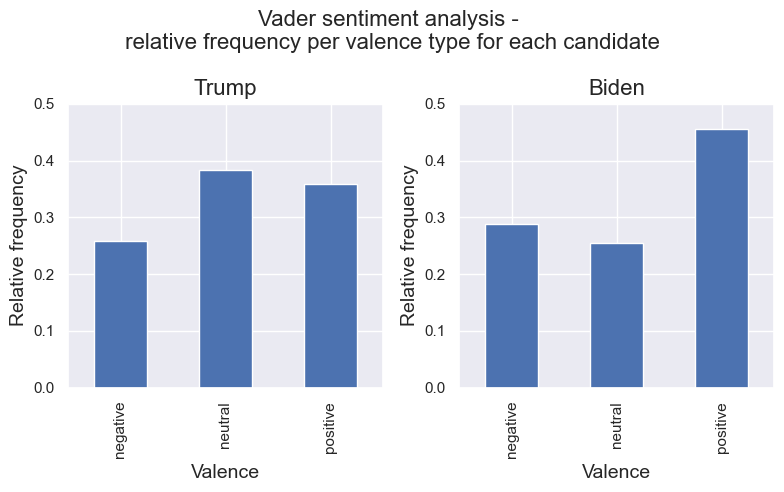

In [138]:
import seaborn as sns
sns.set_theme(style="darkgrid")

trump_tmp = get_valence_relative_freq(trump_df)
biden_tmp = get_valence_relative_freq(biden_df)

#plt.figure(figsize=(8,6))
fig, axes = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('Vader sentiment analysis - \nrelative frequency per valence type for each candidate', fontsize=16)
#fig.tight_layout()

#sns.barplot(trump_tmp.index, trump_tmp.values, ax=axes[0])
(trump_tmp).plot(kind='bar', ax = axes[0])
axes[0].set_title('Trump', fontsize = 16)
axes[0].set_xlabel('Valence', fontsize = 14)
axes[0].set_ylabel('Relative frequency', fontsize = 14)
axes[0].set_ylim(0, .5)

#ax2 = sns.countplot(x="comp_score", data=biden_tmp)
#sns.barplot(biden_tmp.index, biden_tmp.values,  ax=axes[1])
(biden_tmp).plot(kind='bar', ax = axes[1])
axes[1].set_title('Biden', fontsize = 16)
axes[1].set_xlabel('Valence', fontsize = 14)
axes[1].set_ylabel('Relative frequency', fontsize = 14)
axes[1].set_ylim(0, .5)

plt.tight_layout()
plt.show()

/var/folders/kb/f8s6crrs62x4qzzz67rpwl0c0000gn/T/ipykernel_37195/3703299749.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])


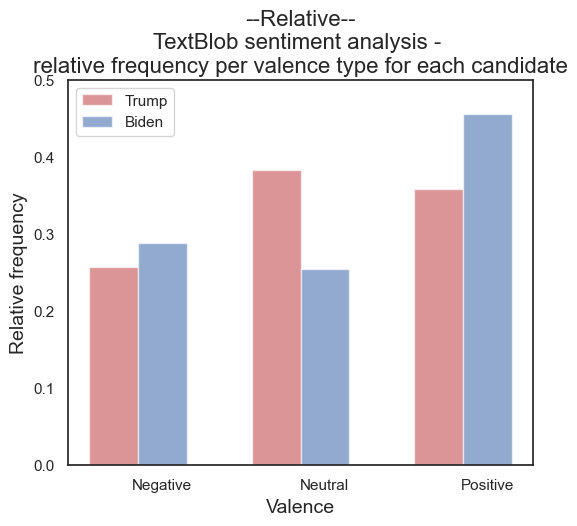

In [139]:
plt.figure(figsize=(6,5))
sns.set_style("white")

ax = plt.gca()
ax.set_title('--Relative--\nTextBlob sentiment analysis - \nrelative frequency per valence type for each candidate', fontsize=16)

features = np.array([1,2,3])

trump = get_valence_relative_freq(trump_df)
ax.bar(features-0.3, trump.values, width=0.3, align = 'center', color = 'r', alpha= .6)

biden = get_valence_relative_freq(biden_df)
ax.bar(features, biden.values, width=0.3, align = 'center', color = 'b', alpha= .6)

ax.set_ylim(0, .5)
ax.set_xlabel('Valence', fontsize = 14)
ax.set_ylabel('Relative frequency', fontsize = 14)

ax.set_xticklabels(['', '', 'Negative', '', 'Neutral', '', 'Positive'])

labels= ["Trump", "Biden"]
ax.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

### Some observations we can make based on plot above:
- within-candidates: Trump has a ratio of 1:1 for positive to negative tweets, while for Biden, it's almost 2:1
- between-candidates: 
    - higher % of positive tweets for Biden
    - higher % of negative tweets for Trump

## Average sentiment score per candidate

-0.023819167287828773
0.12480882372927428


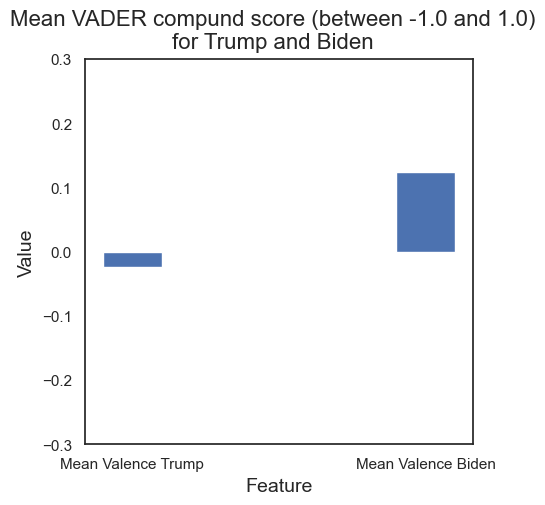

In [140]:
print(trump_df['vader_polarity'].mean())
print(biden_df['vader_polarity'].mean())

fig = plt.figure(figsize=(5,5))

fig.suptitle('Mean VADER compund score (between -1.0 and 1.0)\nfor Trump and Biden', fontsize=16)

features = ['Mean Valence Trump', 'Mean Valence Biden']
values = [trump_df['vader_polarity'].mean(), biden_df['vader_polarity'].mean()]

plt.bar(features,values, width=0.2)

axes = plt.gca()
axes.set_ylim(-.3, .3)
axes.set_xlabel('Feature', fontsize = 14)
axes.set_ylabel('Value', fontsize = 14)

plt.show()

Let's explore further the differences between sentiment for the two candidates.
We continue with visual inspection of the distribution of sentiment scores. Biden supporters are more positive than Trump's supporters as manifested in tweets.

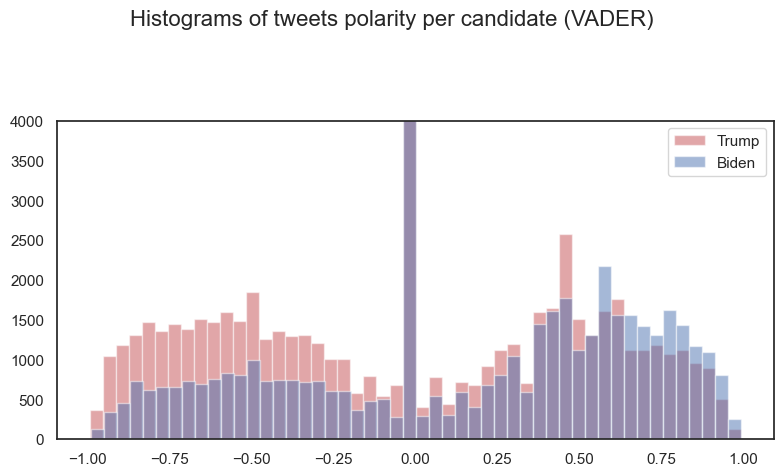

In [143]:
bins = 50

fig = plt.figure(figsize=(8,5))
fig.suptitle('Histograms of tweets polarity per candidate (VADER)', fontsize=16)

plt.hist(trump_df['vader_polarity'], bins = bins, alpha = 0.5, color = 'r')
plt.hist(biden_df['vader_polarity'], bins = bins, alpha = 0.5, color = 'b')

axes = plt.gca()
axes.set_ylim(0, 4000)
labels= ["Trump", "Biden"]
axes.legend(labels)

fig.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()

## 6. Sentiment analysis with Flair

Flair is a pre-trained character-level LSTM (recurrent neural networks) classifier which takes into account:
- the sequence of words
- the sequence of letters 
- intensifiers ('so', 'very' etc)
Advantage over VADER: by looking at character level, it can recognize and correct for typos (e.g. it will recognize that 'anoy' means 'annoy'), which for VADER would just be an OOV (Out Of Vocabulary) word (and thus ignored).

Advantage over VADER: by looking at character level, it can recognize and correct for typos (e.g. it will recognize that 'anoy' means 'annoy'), which for VADER would just be an OOV (Out Of Vocabulary) word (and thus ignored).

### Pre-trained Flair models
As we lack computing power, we will use a freely available pre-trained Flair model.  

For sentiment classification, Flair offers two pre-trained models (as mentioned in one of the [official Flair tutorials on their github here](https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_2_TAGGING.md)):

<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	table.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid black;
	}
	table.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>

<table class="tableizer-table" style="border: 1px solid #CCC;">
<thead><tr class="tableizer-firstrow"><th>ID</th><th>Language</th><th>Task</th><th>Training Dataset</th><th>Accuracy</th></tr></thead><tbody>
 <tr><td>sentiment'</td><td>English</td><td>detecting positive and negative sentiment (transformer-based)</td><td>movie and product reviews</td><td>98.87</td></tr>
 <tr><td>sentiment-fast'</td><td>English</td><td>detecting positive and negative sentiment (RNN-based)</td><td>movie and product reviews</td><td>96.83</td></tr>
</tbody></table>

#### Not able to run Flair locally. It requires GPU acceraltor and can be run on Google Collab on 1000 records for the sake of study.